## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?


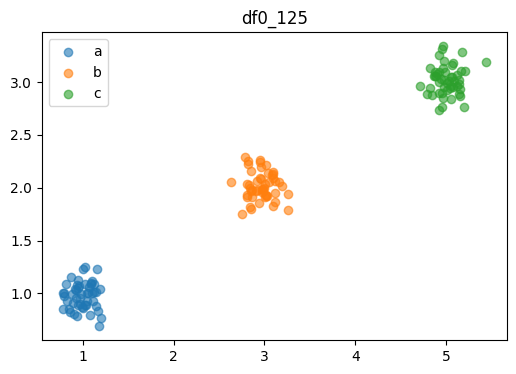

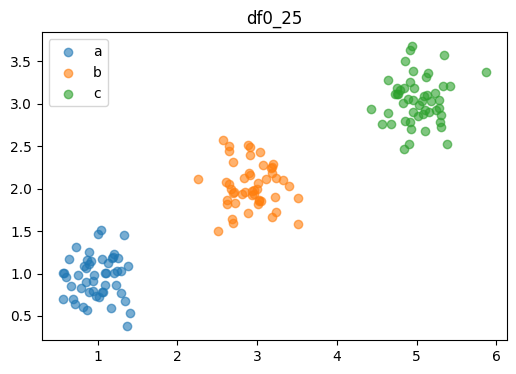

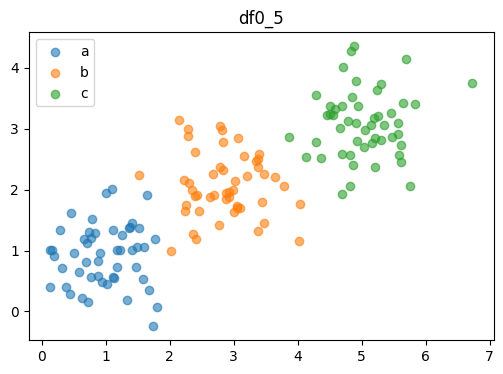

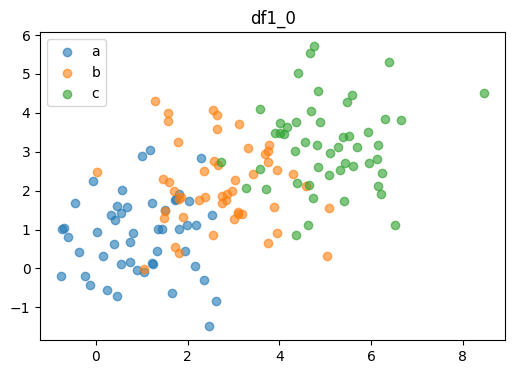

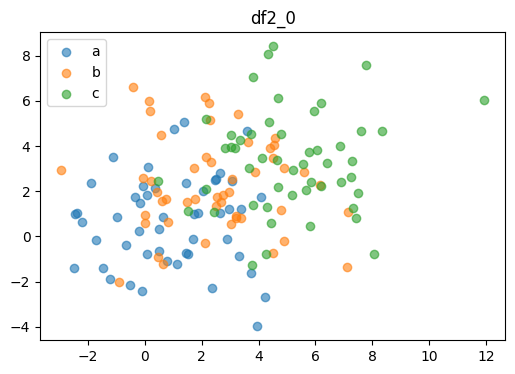

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

def createData(noise, N=50):
    np.random.seed(100)
    X1 = np.array([np.random.normal(1, noise, N), np.random.normal(1, noise, N)])
    X2 = np.array([np.random.normal(3, noise, N), np.random.normal(2, noise, N)])
    X3 = np.array([np.random.normal(5, noise, N), np.random.normal(3, noise, N)])
    gdf1 = pd.DataFrame({'x1': X1[0, :], 'x2': X1[1, :], 'group': 'a'})
    gdf2 = pd.DataFrame({'x1': X2[0, :], 'x2': X2[1, :], 'group': 'b'})
    gdf3 = pd.DataFrame({'x1': X3[0, :], 'x2': X3[1, :], 'group': 'c'})
    df = pd.concat([gdf1, gdf2, gdf3], axis=0)
    return df

datasets = {
    "df0_125": createData(0.125),
    "df0_25": createData(0.25),
    "df0_5": createData(0.5),
    "df1_0": createData(1.0),
    "df2_0": createData(2.0)
}

for name, df in datasets.items():
    plt.figure(figsize=(6, 4))
    groups = df.groupby('group')
    for label, group in groups:
        plt.scatter(group.x1, group.x2, label=label, alpha=0.6)
    plt.title(name)
    plt.legend()
    plt.show()


3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)

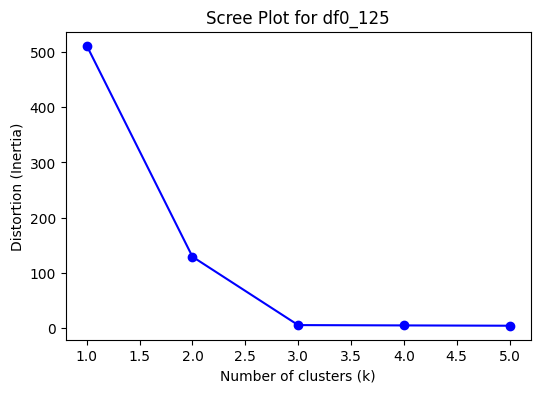

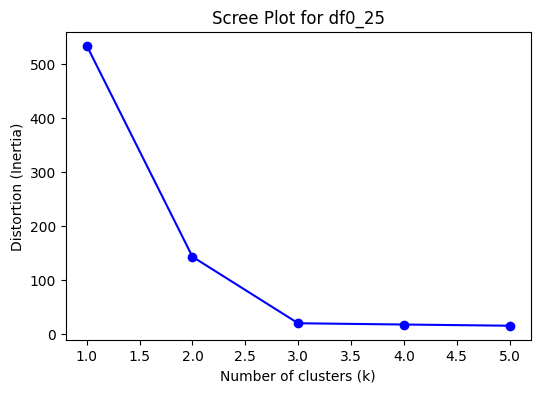

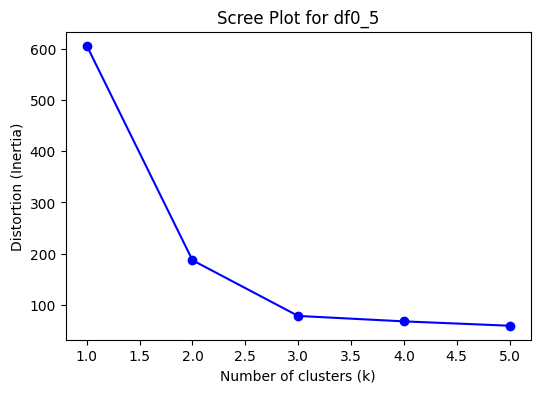

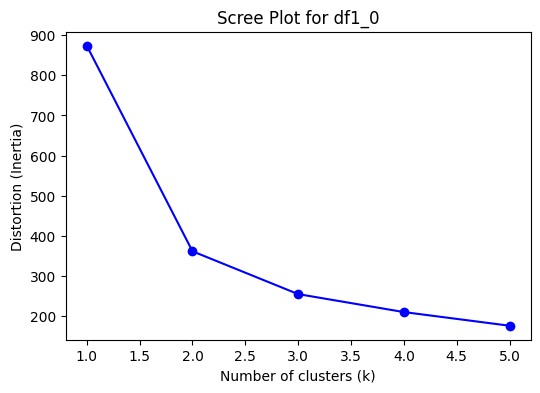

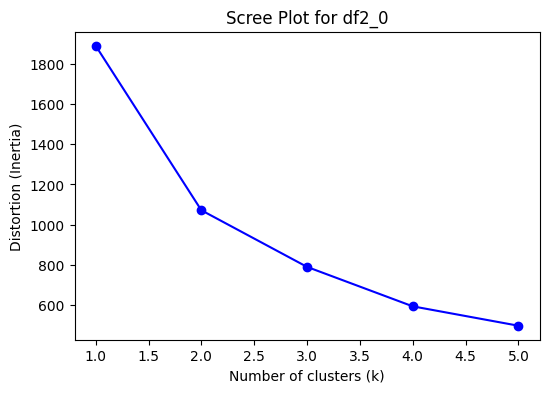

In [4]:
def plot_scree(df, title):
    X = df[['x1', 'x2']].values
    distortions = []
    K = range(1, 6)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=100, n_init=10, max_iter=300)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    plt.figure(figsize=(6, 4))
    plt.plot(K, distortions, 'bo-', markersize=6)
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Inertia)')
    plt.title(f'Scree Plot for {title}')
    plt.show()

for name, df in datasets.items():
    plot_scree(df, name)


4. Explain the intuition of the elbow, using this numerical simulation as an example.

When k = 1, all points belong to one cluster, so the distortion is high. As k increases, clusters become smaller and better fit the data, reducing the distortion. At some point, increasing k beyond a certain value provides diminishing returns, hence the "elbow" appearing. The elbow is thus where the ideal k is located, as it represents the best trade-off between simplicity and accuracy.

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/deancuva/clustering/refs/heads/main/assignment/data/airbnb_hw.csv"
df = pd.read_csv(url)

def clean_column(df, column_name):
    if column_name in df.columns:
        df[column_name] = df[column_name].astype(str).str.replace(r'[^\d.]', '', regex=True)
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    else:
        print(f"Warning: Column '{column_name}' not found in DataFrame.")
    return df

columns_to_clean = ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']
for col in columns_to_clean:
    df = clean_column(df, col)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  30475 non-null  object 
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  float64
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30478 non-null  int64  
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(4), int64(4), object

2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['Price', 'Beds', 'Number Of Reviews', 'Review Scores Rating']

df = df.dropna(subset=columns_to_normalize)

scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 22111 entries, 4 to 30409
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     22111 non-null  int64  
 1   Host Since                  22111 non-null  object 
 2   Name                        22111 non-null  object 
 3   Neighbourhood               22111 non-null  object 
 4   Property Type               22109 non-null  object 
 5   Review Scores Rating (bin)  22111 non-null  float64
 6   Room Type                   22111 non-null  object 
 7   Zipcode                     22012 non-null  float64
 8   Beds                        22111 non-null  float64
 9   Number of Records           22111 non-null  int64  
 10  Number Of Reviews           22111 non-null  float64
 11  Price                       22111 non-null  float64
 12  Review Scores Rating        22111 non-null  float64
dtypes: float64(6), int64(2), object(5)
m

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?